#Projeto de Análise de Dados com Pandas - Supermarket Sales Dataset

##Importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

df = pd.read_csv('/content/SuperMarket Analysis.csv')

##Exploração Inicial

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


##Limpeza e Ajustes

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


##Análises

###Total Vendido Por Cidade/Loja/Linha de Produto/Mês



In [ ]:
df['Quantity'].sum()

np.int64(5510)

In [ ]:
df.groupby('City')['Quantity'].sum()

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


In [ ]:
df.groupby('City')['Sales'].sum().round(2)

,Sales
City,
Mandalay,106197.67
Naypyitaw,110568.71
Yangon,106200.37


In [ ]:
df.groupby('Product line')['Quantity'].sum()

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [ ]:
df['Month'] = df['Date'].apply(lambda x: x.strftime('%B'))

df.groupby('Month')['Quantity'].sum()

,Quantity
Month,
February,1654
January,1965
March,1891


###Faturamento médio por Tipo de Cliente (NormalxMembro)

In [ ]:
df.groupby('Customer type')['Sales'].mean().round(2)

,Sales
Customer type,
Member,335.74
Normal,306.37


###Dias e Horários de Maior Venda

In [ ]:
dia = df['Date'].dt.day
agrupado = df.groupby([dia, 'Time'])['Sales'].sum()
agrupado.sort_values(ascending=False)


,,Sales
Date,Time,
7,11:28:00 AM,1323.4200
15,3:01:00 PM,1284.5700
20,3:55:00 PM,1244.1975
8,10:53:00 AM,1146.9990
6,12:46:00 PM,1142.7150
...,...,...
4,1:38:00 PM,14.6790
8,2:11:00 PM,13.4190
21,12:38:00 PM,13.1670


###Linha de Produto mais Lucrativa

In [ ]:
df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

,Sales
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


##Vizualizações

###Gráfico de Barras: Receita por Linha de Produto

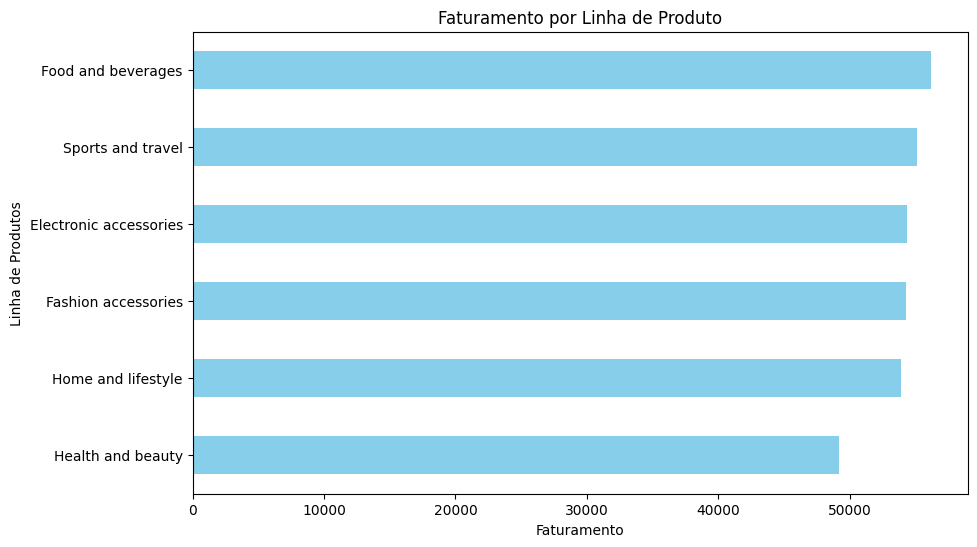

In [ ]:
faturamento_por_produto = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

faturamento_por_produto.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Faturamento por Linha de Produto')
plt.xlabel('Faturamento')
plt.ylabel('Linha de Produtos')
plt.gca().invert_yaxis()  # Coloca o maior valor no topo
plt.show()

###Gráfico de Pizza: Participação de Vendas por Cidade

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February


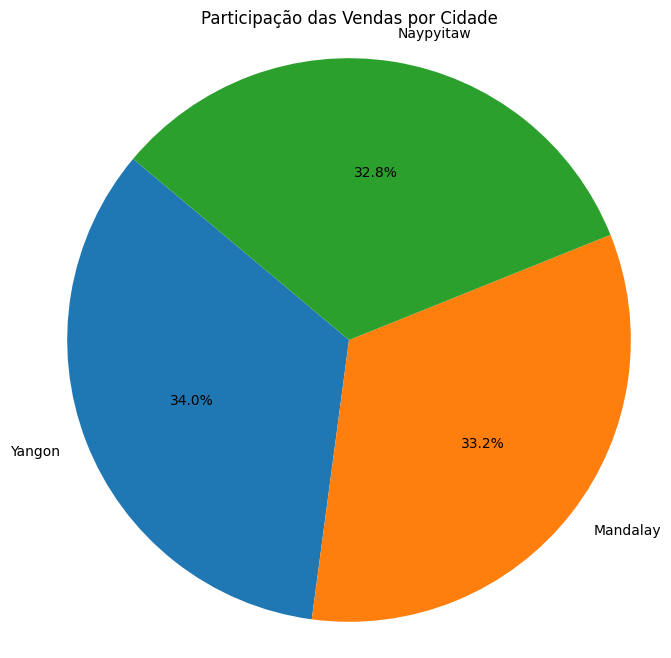

In [ ]:
# Agrupar por cidade e contar o número de vendas
vendas_por_cidade = df['City'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_cidade, labels=vendas_por_cidade.index, autopct='%1.1f%%', startangle=140)
plt.title('Participação das Vendas por Cidade')
plt.axis('equal')  # Deixa o gráfico redondo

plt.show()



###Linha do tempo: evolução diária das vendas

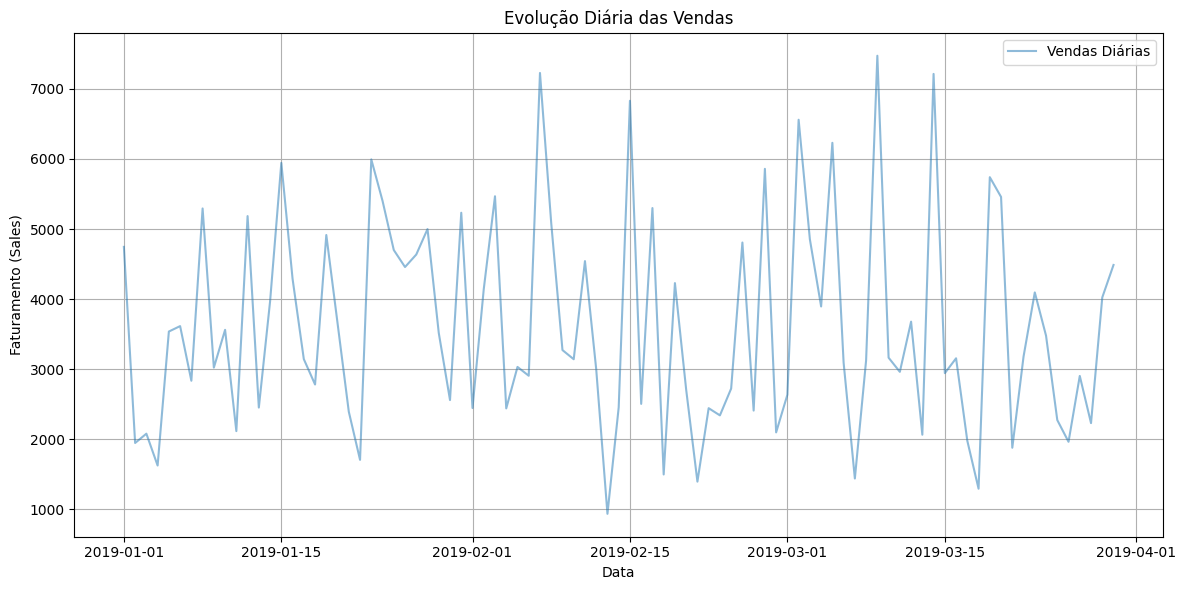

In [ ]:
vendas_diarias = df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(vendas_diarias.index, vendas_diarias.values, label='Vendas Diárias', alpha=0.5)

plt.title('Evolução Diária das Vendas')
plt.xlabel('Data')
plt.ylabel('Faturamento (Sales)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Conclusão - Insights

Yangon foi a cidade com o maior número de vendas, total de 1859, porém a cidade com maior receita foi Naypyitaw com total de $110.568 em vendas já reduzindo a taxa de venda.

As cidades tem uma participação (%) das vendas muito bem distribuída, com pouca diferença.
Assim como as linhas de produtos também. Todas faturam de forma bem equivalente.

Food and beverages foi a linha de produto que mais faturou em relação às outras, porém com uma diferença leve. Total de $56.144 em vendas.

Uma análise interessante é que o faturamento médio é maior em clientes que são membros em relação aos que não são.

